In [1]:
import pandas as pd
import math
import numpy as np
from prophet import Prophet
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px 
import random
import matplotlib.pyplot as plt
from XTBClient.api import XTBClient, PERIOD, MODES, TRANSACTION_TYPE
import os
from utility import utility
from datetime import datetime, timedelta
from time import sleep
import logging
import importlib

In [2]:
logging.getLogger('XTBApi.api').setLevel(logging.WARNING)

In [3]:
def store(df, name="bot.csv"):
    """Concats the data from a csv and the data from dataframe, then saves it to the csv"""

    name = os.path.join("csvs", name)
    if os.path.exists(name):
        read = pd.read_csv(name)
        df = pd.concat([df, read])
        # df = df.drop_duplicates(subset=["symbol", df.index])

    df[[col for col in df.columns if col != "index"]].to_csv(name, index=False)
    df.to_csv(name)

    return df

In [4]:
def get_df(name):
    name = os.path.join("csvs", name)
    read = None
    if os.path.exists(name):
        read = pd.read_csv(name)

    return read

In [5]:
def collect():
    c = XTBClient()
    c.login(os.environ.get("XTB_login"), os.environ.get("XTB_pass"))
    ticks = c.get_ticks(["EURUSD"])
    c.logout()

    df = pd.DataFrame(
        columns=["symbol", "ask", "bid", "high", "low", "timestamp", 'date'], 
    ).reset_index(drop=True).set_index('date')
    
    for quot in ticks["quotations"]:
        new = pd.DataFrame(
            [quot]
        )
        
        new['date'] = datetime.fromtimestamp(quot["timestamp"] / 1000)
        new.set_index('date', inplace=True)
        df = pd.concat([df, new])
    return store(df)

In [6]:
# collect()
# df = get_df("bot.csv")

In [7]:
c = XTBClient()
c.login(os.environ.get("XTB_login"), os.environ.get("XTB_pass"))
ticks = c.get_ticks(["EURUSD"])
c.logout()

In [8]:
df = pd.DataFrame(
    columns=["symbol", "ask", "bid", "high", "low", "timestamp", 'date'], 
).reset_index(drop=True).set_index("date")

In [9]:
df.head()

,symbol,ask,bid,high,low,timestamp
date,,,,,,


In [10]:
for quot in ticks["quotations"]:
    new = pd.DataFrame(
        [quot]
    )

    new['date'] = datetime.fromtimestamp(quot["timestamp"] / 1000)
    new.set_index('date', inplace=True)
    df = pd.concat([df, new])
df.head()

,symbol,ask,bid,high,low,timestamp,askVolume,bidVolume,level,exemode,spreadRaw,spreadTable
date,,,,,,,,,,,,
2023-06-13 20:31:17.298,EURUSD,1.07847,1.07839,1.08231,1.07567,1686681077298,350000.0,349000.0,0.0,1.0,0.00008,0.8


In [11]:
name = os.path.join("csvs", "bot.csv")
if os.path.exists(name):
    read = pd.read_csv(name)
    df = pd.concat([df, read])
    # df = df.drop_duplicates(subset=["symbol", df.index])



In [12]:
df.head()

,symbol,ask,bid,high,low,timestamp,askVolume,bidVolume,level,exemode,spreadRaw,spreadTable
date,,,,,,,,,,,,
2023-06-13 20:31:17.298,EURUSD,1.07847,1.07839,1.08231,1.07567,1686681077298,350000.0,349000.0,0.0,1.0,0.00008,0.8


In [13]:
# df[[col for col in df.columns if col != "index"]].to_csv(name, index=False)
df.to_csv(name, index=True)

In [14]:
name = os.path.join("csvs", "bot.csv")
if os.path.exists(name):
    read = pd.read_csv(name, index_col=0)
    df = pd.concat([df, read])
    # df = df.drop_duplicates(subset=["symbol", df.index])

In [15]:
df

,symbol,ask,bid,high,low,timestamp,askVolume,bidVolume,level,exemode,spreadRaw,spreadTable
date,,,,,,,,,,,,
2023-06-13 20:31:17.298000,EURUSD,1.07847,1.07839,1.08231,1.07567,1686681077298,350000.0,349000.0,0.0,1.0,0.00008,0.8
2023-06-13 20:31:17.298,EURUSD,1.07847,1.07839,1.08231,1.07567,1686681077298,350000.0,349000.0,0.0,1.0,0.00008,0.8


In [19]:
c = XTBClient()
c.login(os.environ.get("XTB_login"), os.environ.get("XTB_pass"))
candles = c.get_candles_in_range("EURUSD", PERIOD.ONE_MINUTE.value,  datetime.today() - timedelta(hours=1))
c.logout()

In [13]:
df = utility.collect_yf("EURUSD=x", period="1d", interval="5m")

In [14]:
utility.analyze(df, means=[10,15])

In [16]:
df[df.is_trade != 0]

,datetime,open,high,low,close,adj close,MA_10,MA_15,diff,diff_prev,is_trade
5,2023-06-15 02:45:00,1.084246,1.084363,1.084246,1.084363,1.084363,1.084340,1.084340,-3.973643e-09,0.000031,-1
33,2023-06-15 05:05:00,1.081783,1.081783,1.081783,1.081783,1.081783,1.081561,1.081541,1.949867e-05,-0.000020,1
43,2023-06-15 05:55:00,1.081432,1.081666,1.081432,1.081666,1.081666,1.081596,1.081603,-7.808208e-06,0.000004,-1
47,2023-06-15 06:15:00,1.081549,1.081783,1.081549,1.081666,1.081666,1.081584,1.081580,3.890196e-06,-0.000035,1
48,2023-06-15 06:20:00,1.081666,1.081666,1.081549,1.081549,1.081549,1.081572,1.081588,-1.560052e-05,0.000004,-1
50,2023-06-15 06:30:00,1.081666,1.081666,1.081666,1.081666,1.081666,1.081549,1.081549,3.973643e-09,-0.000023,1
52,2023-06-15 06:40:00,1.081666,1.081666,1.081549,1.081549,1.081549,1.081572,1.081580,-7.796288e-06,0.000008,-1
64,2023-06-15 07:40:00,1.082134,1.082134,1.082134,1.082134,1.082134,1.081514,1.081502,1.176198e-05,-0.000016,1
75,2023-06-15 08:35:00,1.081549,1.081549,1.081315,1.081315,1.081315,1.081923,1.081962,-3.900925e-05,0.000082,-1
87,2023-06-15 09:35:00,1.081783,1.081783,1.081549,1.081783,1.081783,1.081397,1.081385,1.170238e-05,-0.000082,1


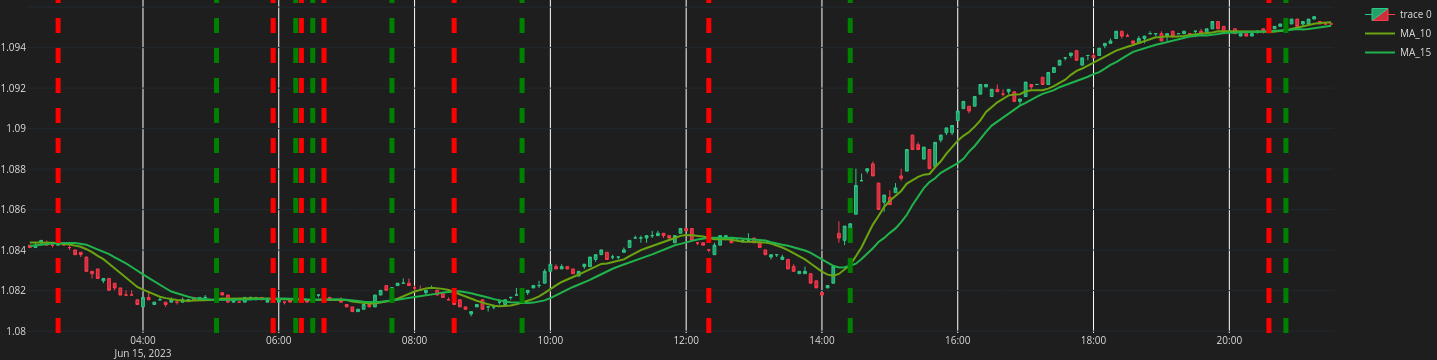

In [15]:
utility.CandleStick(df)